<h2 align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-06-23 09:18:39.267440: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 09:18:44.445505: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 09:18:44.479041: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 09:18:53.872791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [17]:
len(X_train)
X_train[0].shape
X_train[0][0].shape

60000

In [10]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

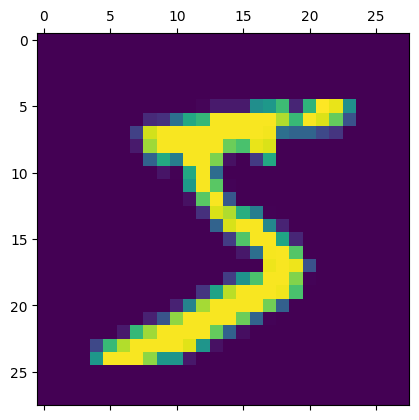

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened

In [18]:
X_train_flattened[0].shape

(784,)

<h3>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [19]:
# 10 -> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
# 10 outputs neurons
# 784 input neurons
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# default batch_size = 32
# default epochs = 1
# adam optimizer,  
model.fit(X_train_flattened, y_train, epochs=5)

2023-06-23 10:13:39.350463: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 10.0471 - accuracy: 0.8386
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0854 - accuracy: 0.8777
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6928 - accuracy: 0.8829
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4353 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5631 - accuracy: 0.8858


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.8561 - accuracy: 0.8925


[5.856133937835693, 0.8924999833106995]

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]
# y_predicted = [0.1, 0.3, 0.2, 0.9, 0.05, 0.8, 0.1, 0.1, 0.01, 0.99]
# y_predicted means the predicted value of each number

313/313 [==============================] - 1s 3ms/step


array([0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       3.3174413e-08, 1.0000000e+00, 1.0000000e+00, 3.5884874e-08,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

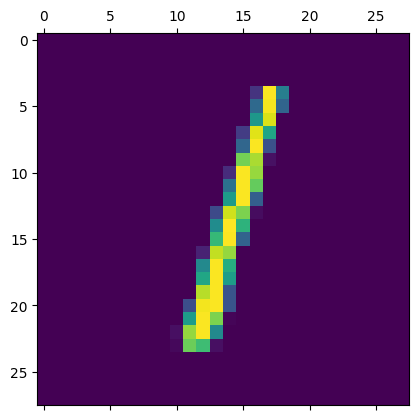

In [27]:
plt.matshow(X_test[2])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [28]:
np.argmax(y_predicted[2])

1

In [32]:
# converting y_predicted into concrete class labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [33]:
y_predicted_labels[:5]

[3, 0, 1, 0, 0]

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    1,    0,    2,    0,    0,    0,    0,    0],
       [   3, 1130,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 317,  354,  348,    4,    8,    0,    1,    0,    0,    0],
       [ 100,  136,  378,  394,    2,    0,    0,    0,    0,    0],
       [ 178,   66,   72,  205,  461,    0,    0,    0,    0,    0],
       [ 164,   37,  143,  312,  124,  111,    0,    0,    1,    0],
       [ 340,   68,  475,   25,   27,   21,    2,    0,    0,    0],
       [ 141,  101,   74,  694,   14,    2,    0,    2,    0,    0],
       [ 120,  288,  306,  207,   32,   20,    1,    0,    0,    0],
       [  91,   57,   51,  618,  181,    3,    0,    4,    3,    1]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

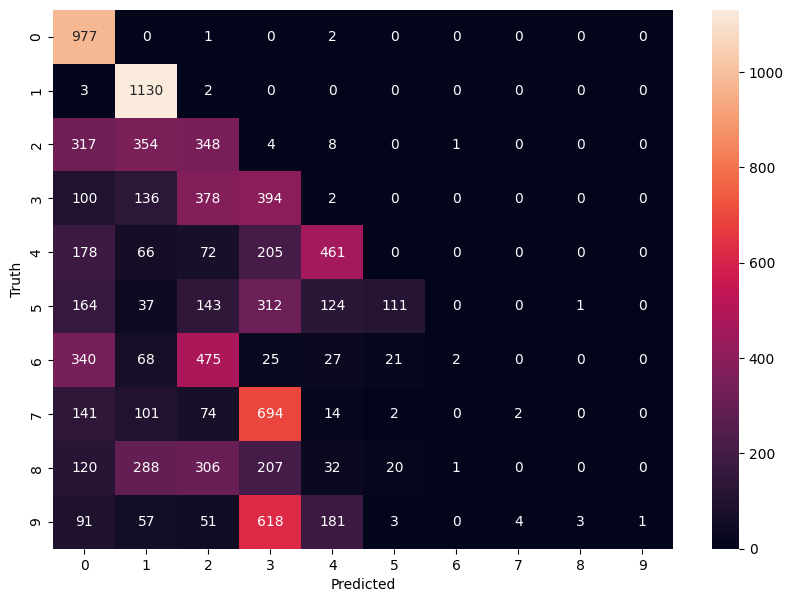

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Using hidden layer</h3>

In [41]:
# 100 -> 100 hidden layers neurons / output neurons
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-06-23 11:24:34.286448: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 2.2553 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3967 - accuracy: 0.9017
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.9230
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2520 - accuracy: 0.9340
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2362 - accuracy: 0.9383


In [43]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2854 - accuracy: 0.9347


[0.28537142276763916, 0.9347000122070312]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

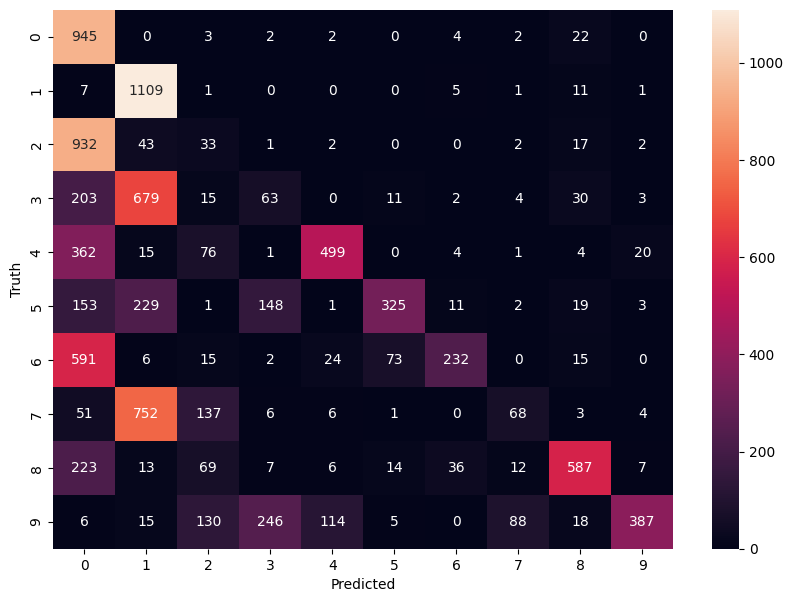

In [44]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [46]:
# previous model we flatten the input data by ourselves using reshape
# but keras has a built in function to do that
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (1), one imge of 28x28
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0161 - accuracy: 0.8416
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3857 - accuracy: 0.9065
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2869 - accuracy: 0.9279
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2439 - accuracy: 0.9383
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2220 - accuracy: 0.9435
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2103 - accuracy: 0.9472
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2023 - accuracy: 0.9505
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1930 - accuracy: 0.9532
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1833 - accuracy: 0.9553
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.177

##### Loss,Accuracy Data Visualization

In [53]:
loss = history.history['loss']
accuracy = history.history['accuracy']

loss

[2.016094923019409,
 0.38570573925971985,
 0.2869263291358948,
 0.243852436542511,
 0.22195445001125336,
 0.21028925478458405,
 0.20228610932826996,
 0.19301199913024902,
 0.18330314755439758,
 0.17794236540794373]

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

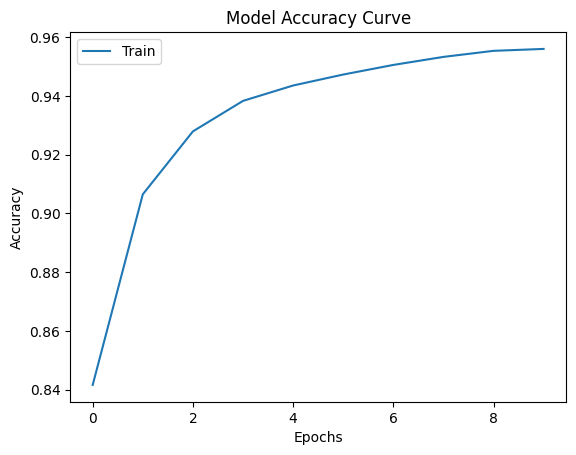

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curve')
plt.legend(['Train'], loc='upper left')
plt.show()

In [60]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9779


[0.08133944123983383, 0.9779000282287598]